In [1]:
import warnings
warnings.filterwarnings('ignore')
import mysql.connector
import pandas as pd
import numpy as np

In [2]:
# Step 1: Set up the connection
db_connection = mysql.connector.connect(
    host="localhost",       # Replace with your host, e.g., "127.0.0.1"
    user="root",   # Replace with your MySQL username
    password="root", # Replace with your MySQL password
    database="e_master_card"  # Replace with your database name
)

In [3]:
# Step 2: Query the database
# Step 3: Load data into a pandas DataFrame
#df = pd.read_sql(query, db_connection)
df_cust = pd.read_sql("SELECT * FROM customers", db_connection)
# Step 4: Display the DataFrame
df_cust.head()


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [4]:
df_transactions = pd.read_sql("SELECT * FROM transactions", db_connection)
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [5]:
df_cp = pd.read_sql("SELECT * FROM credit_profiles", db_connection)
df_cp.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [6]:
db_connection.close()

In [7]:
df_cust.iloc[[14,82]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,0,Single


In [8]:
(df_cust['annual_income'] == 0).sum()

np.int64(50)

In [9]:
median_as_per_occupation= df_cust.groupby('occupation')['annual_income'].median()

In [10]:
df_cust['annual_income'] = df_cust.apply(
    lambda row: median_as_per_occupation[row['occupation']]
    if row['annual_income'] == 0 else row['annual_income'],
    axis=1
)

In [11]:
df_cust.iloc[[14,22, 82]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,44915.0,Married
22,23,Ishan Patel,Male,19,City,Freelancer,36863.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,45189.5,Single


In [12]:
(df_cust['annual_income'] == 0).sum()

np.int64(0)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

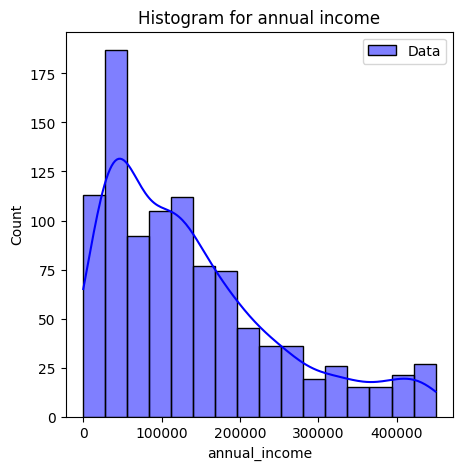

In [14]:
plt.figure(figsize = (5,5))
sns.histplot(df_cust['annual_income'], kde = True, color = 'blue', label = 'Data')
plt.title('Histogram for annual income')
plt.legend()
plt.show()

In [15]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138634.437500
std,288.819436,15.666155,110961.396638
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [16]:
df_cust[df_cust.annual_income < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [17]:
median_as_per_occupation

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [18]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [19]:
df_cust.at[4, 'name']

'Advait Malik'

In [20]:
for index, row in df_cust.iterrows():
    if row ['annual_income'] < 100:
        df_cust.at[index, 'annual_income'] = median_as_per_occupation[row['occupation']]

In [21]:
df_cust[df_cust.annual_income <100 ]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [22]:
df_cust.loc[[31, 316]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,254881.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,51175.0,Married


In [23]:
mean_as_per_occupation= df_cust.groupby('occupation')['annual_income'].mean()
mean_as_per_occupation

occupation
Accountant              64123.562500
Artist                  45239.842105
Business Owner         268119.833910
Consultant              59927.257732
Data Scientist         136208.603261
Freelancer              76293.089912
Fullstack Developer     78618.385135
Name: annual_income, dtype: float64

In [24]:
mean_as_per_occupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [25]:
mean_as_per_occupation.values

array([ 64123.5625    ,  45239.84210526, 268119.83391003,  59927.25773196,
       136208.60326087,  76293.08991228,  78618.38513514])

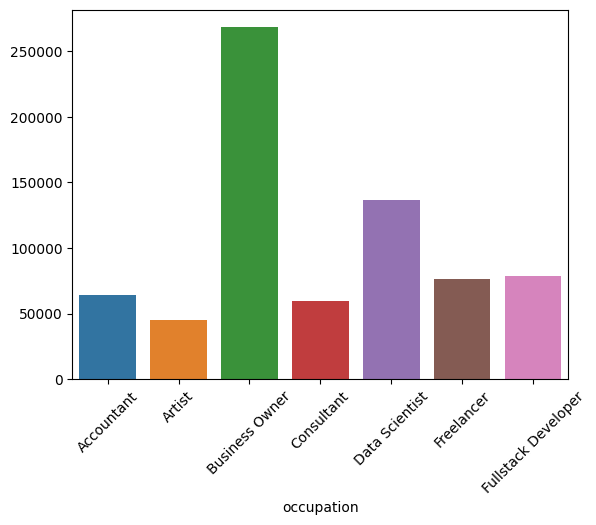

In [26]:
sns.barplot(x = mean_as_per_occupation.index, y= mean_as_per_occupation.values, palette = 'tab10')
plt.xticks(rotation = 45)
plt.show()

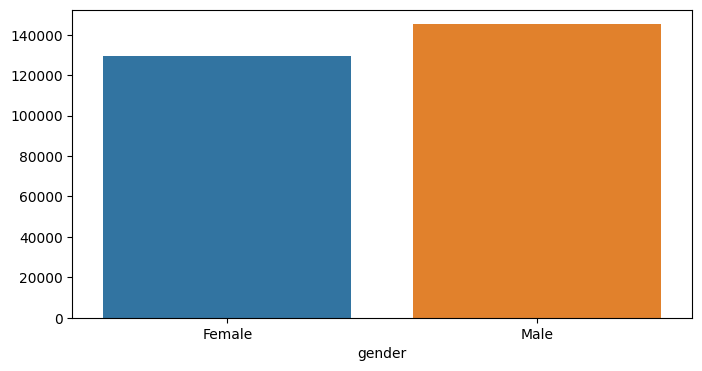

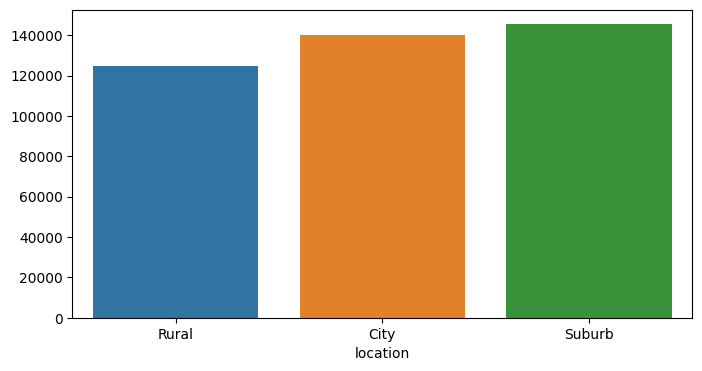

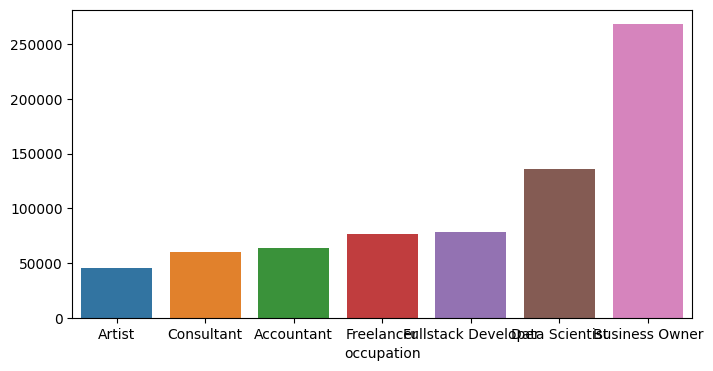

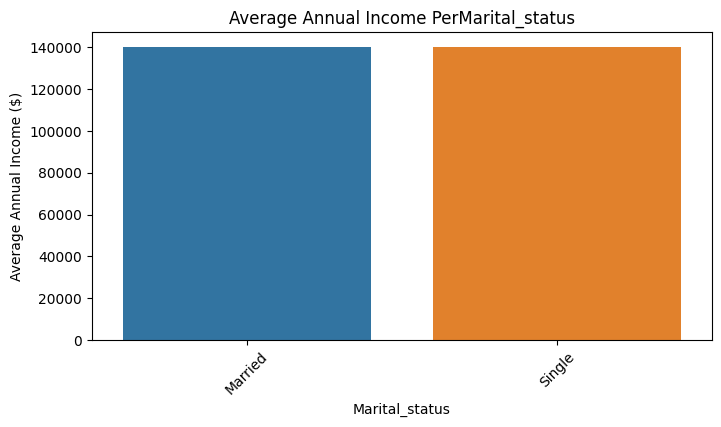

In [27]:
categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

for col in categorical_columns:
    plt.figure(figsize = (8,4))
    mean_as_per_occupation= df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x = mean_as_per_occupation.index, y= mean_as_per_occupation.values, palette = 'tab10')
plt.xticks(rotation = 45)
plt.title(f'Average Annual Income Per{col.capitalize()}')
plt.xlabel(col.capitalize())
plt.ylabel('Average Annual Income ($)')
plt.show()

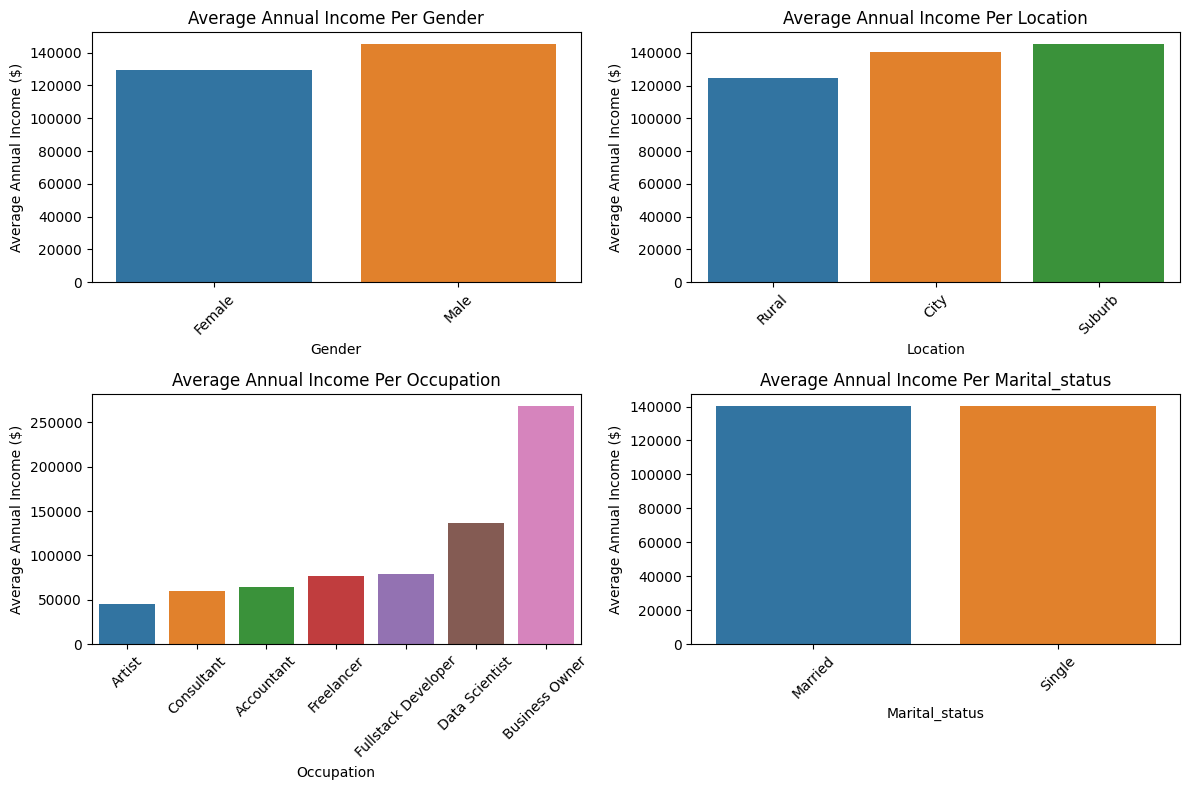

In [28]:
categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

# Set up the grid
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    mean_as_per_category = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=mean_as_per_category.index, y=mean_as_per_category.values, palette='tab10')
    plt.title(f'Average Annual Income Per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Average Annual Income ($)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [29]:
age_outliers = df_cust[(df_cust.age <15) | (df_cust.age > 80)]
age_outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [30]:
median_age_per_coccupation = df_cust.groupby('occupation')['age'].median()
median_age_per_coccupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [31]:
for i, row in age_outliers.iterrows():
    df_cust.at[i, 'age'] = median_age_per_coccupation[row['occupation']]

In [32]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.541500,140137.395500
std,288.819436,12.276634,110450.464107
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.250000,195514.250000
max,1000.000000,64.000000,449346.000000


In [33]:
df_cust['age_group'] = pd.cut(
    df_cust['age'], 
    bins=[18, 25, 48, 65], 
    labels=['18-25', '26-48', '49-65'], 
    right=True
)

In [34]:
df_cust.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48


In [35]:
age_group_dist = df_cust.age_group.value_counts(normalize = True)*100
age_group_dist

age_group
26-48    57.563452
18-25    23.451777
49-65    18.984772
Name: proportion, dtype: float64

In [36]:
type(age_group_dist)

pandas.core.series.Series

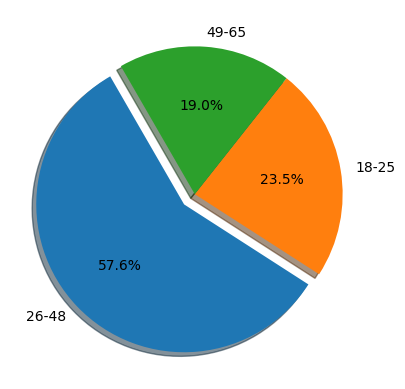

In [37]:
plt.pie(
    age_group_dist, labels =age_group_dist.index, 
    autopct = '%1.1f%%', 
    shadow = True,
    explode = (0.1,0,0),
    startangle = 120
)
plt.show()

In [38]:
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [39]:
df_cust.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [40]:
df_cust.groupby(['location', 'gender']).size()

location  gender
City      Female    226
          Male      457
Rural     Female     26
          Male       59
Suburb    Female     74
          Male      158
dtype: int64

In [41]:
gender_dist_per_location = df_cust.groupby(['location', 'gender']).size().unstack()
gender_dist_per_location

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


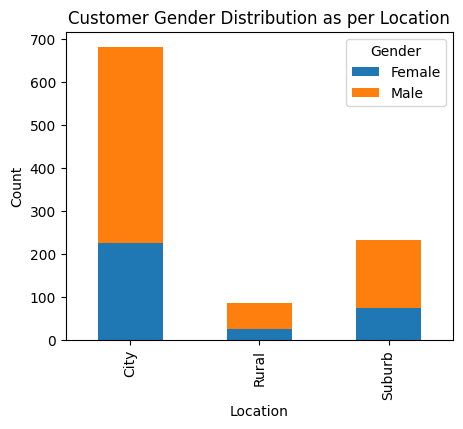

In [42]:
gender_dist_per_location.plot(kind='bar', stacked=True, figsize=(5, 4))
plt.title('Customer Gender Distribution as per Location')

plt.legend(title='Gender')
plt.xlabel('Location')
plt.ylabel('Count')

plt.show()


In [43]:
df_cp.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [44]:
df_cp.shape

(1004, 6)

In [45]:
df_cp['cust_id'].nunique() #tells count of unique values

1000

In [46]:
duplicates = df_cp['cust_id'].duplicated(keep = False)

In [47]:
df_cp[duplicates]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [48]:
df_ccp = df_cp.drop_duplicates(subset = 'cust_id', keep = 'last')
df_ccp.shape  #no remaining duplictes

(1000, 6)

In [49]:
df_ccp.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [50]:
df_ccp[df_ccp.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [51]:
df_ccp.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

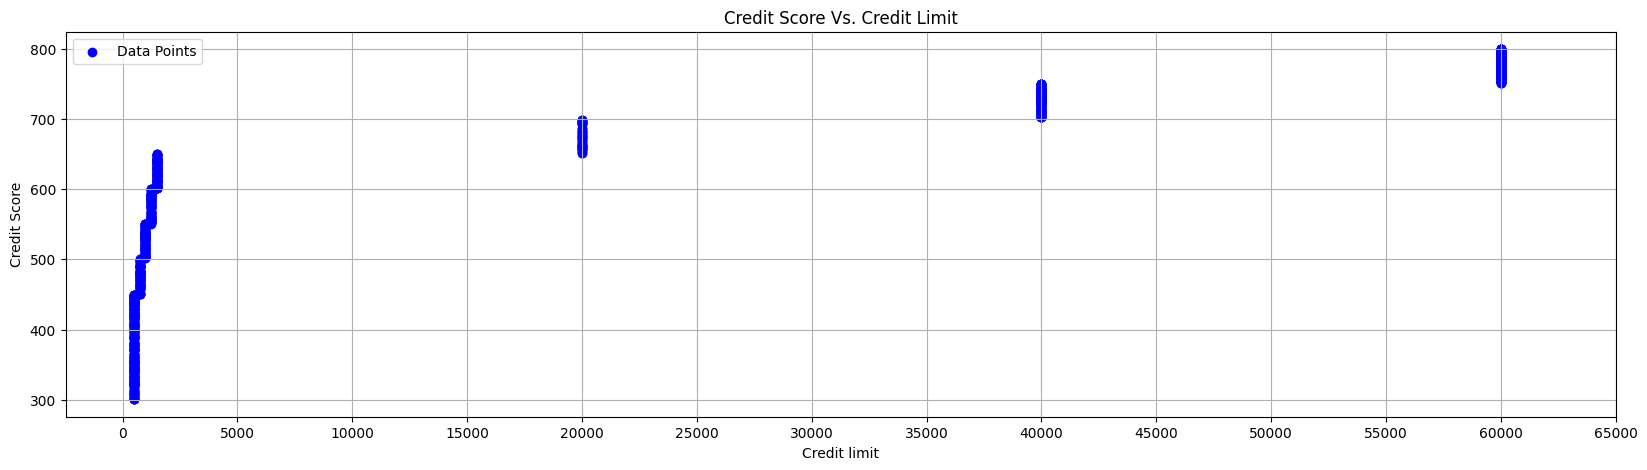

In [52]:
plt.figure(figsize = (20,5))
plt.scatter(df_ccp.credit_limit, df_ccp.credit_score, c= 'b', marker = 'o', label = 'Data Points')

plt.title('Credit Score Vs. Credit Limit')
plt.xlabel('Credit limit')
plt.ylabel('Credit Score')

plt.xticks(range(0,70000, 5000))
plt.grid(True)

plt.legend()

plt.show()

In [57]:
df_ccp['credit_score_range'] = pd.cut(
    df_ccp['credit_score'],
    bins=[300, 450, 500, 550, 600, 650, 700, 750, 800],
    labels=[f'{start}-{end-1}' for start, end in zip(bins, bins[1:])],
    include_lowest=True,
    right=False
)

In [58]:
df_ccp.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [59]:
df_ccp[df_ccp.credit_score_range == '700-749']

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [60]:
mode_cl = df_ccp.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_cl

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [61]:
df_ccp[df_ccp.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
729,726,737,0.136048,205404.0,4.0,NaN,700-749
467,468,354,0.892740,231.0,2.0,NaN,300-449
954,951,513,0.175914,131.0,3.0,NaN,500-549


In [62]:
df_ccp2 = pd.merge(df_ccp, mode_cl, on = 'credit_score_range', suffixes = ('', '_mode'))
df_ccp2.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
389,390,754,0.656635,24274.0,3.0,60000.0,750-799,60000.0
68,69,611,0.680448,721.0,2.0,1500.0,600-649,1500.0
540,541,498,0.843612,371.0,1.0,750.0,450-499,750.0


In [63]:
df_ccp2[df_ccp2.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
400,401,420,0.319390,139.0,0.0,NaN,300-449,500.0
676,677,300,0.785509,341.0,1.0,NaN,300-449,500.0
399,400,754,0.884299,32031.0,2.0,NaN,750-799,60000.0


In [64]:
df_ccp3 = df_ccp2.copy()
df_ccp3['credit_limit'].fillna(df_ccp2['credit_limit_mode'], inplace = True)
df_ccp3.shape

(1000, 8)

In [65]:
df_ccp3.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

In [66]:
df_ccp3.loc[[73, 46]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
73,74,754,0.690655,28215.0,1.0,60000.0,750-799,60000.0
46,47,604,0.146441,194.0,2.0,1500.0,600-649,1500.0


In [67]:
df_ccp3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


<Axes: xlabel='outstanding_debt'>

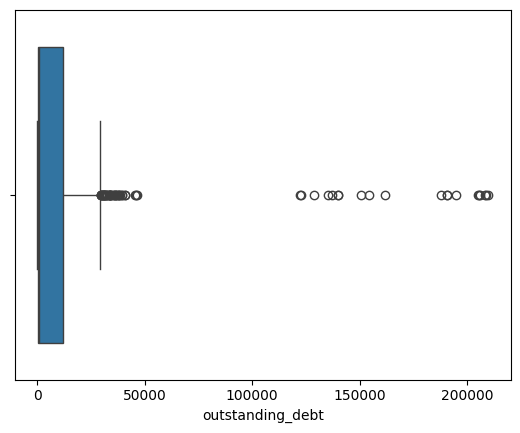

In [68]:
sns.boxplot(x = df_ccp3.outstanding_debt)

In [69]:
df_ccp3[df_ccp3.outstanding_debt > df_ccp3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [70]:
df_ccp3.loc[df_ccp3.outstanding_debt > df_ccp3.credit_limit, 'outstanding_debt'] = df_ccp3.credit_limit

In [71]:
df_ccp3[df_ccp3.outstanding_debt > df_ccp3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [72]:
#Correlation among credit profile variables

In [73]:
df_ccp3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [74]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [75]:
df_merged = df_cust.merge(df_ccp3, on = 'cust_id', how = 'inner')
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [76]:
n_columns = ['age', 'annual_income', 'credit_score', 'outstanding_debt', 'credit_limit', 'credit_utilisation']

corr_matrix = df_merged[n_columns].corr()
corr_matrix

,age,annual_income,credit_score,outstanding_debt,credit_limit,credit_utilisation
age,1.000000,0.618136,0.444917,0.444301,0.510993,-0.027713
annual_income,0.618136,1.000000,0.575685,0.555077,0.684627,-0.086816
credit_score,0.444917,0.575685,1.000000,0.680654,0.847952,-0.070445
outstanding_debt,0.444301,0.555077,0.680654,1.000000,0.810581,0.192838
credit_limit,0.510993,0.684627,0.847952,0.810581,1.000000,-0.080493
credit_utilisation,-0.027713,-0.086816,-0.070445,0.192838,-0.080493,1.000000


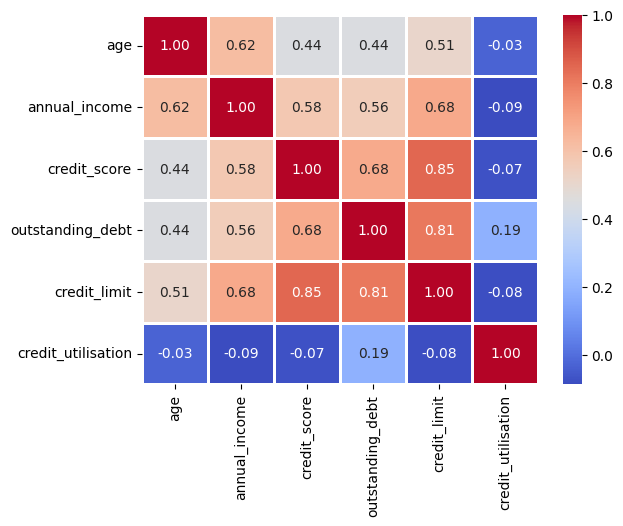

In [77]:
sns.heatmap(corr_matrix, annot= True, fmt='.2f', cmap='coolwarm', linewidths = 0.9)

plt.show()

In [78]:
#Working on transactions table df_transactions

In [79]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [80]:
df_transactions.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

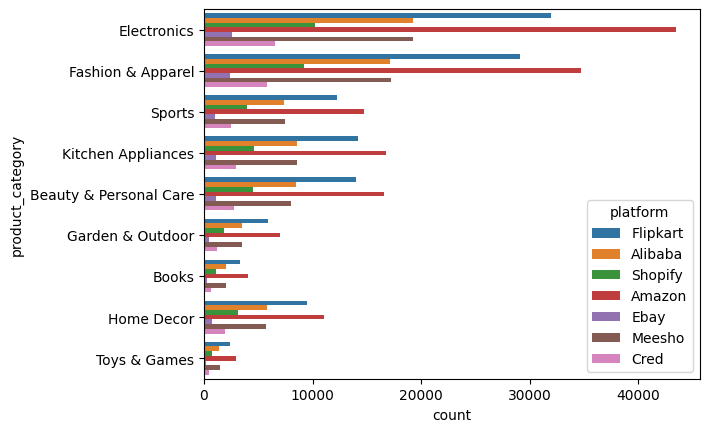

In [81]:
sns.countplot(y = 'product_category', hue = 'platform', data = df_transactions)
plt.show()

In [82]:
df_transactions.platform.mode()[0]

'Amazon'

In [83]:
df_transactions.platform.fillna(df_transactions.platform.mode()[0], inplace = True)

In [84]:
df_transactions.isnull().sum() #Recheck

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [85]:
#Treating Outliers in Transactions Table

In [86]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [87]:
wrong_trans = df_transactions[df_transactions.tran_amount == 0]
wrong_trans.head(5)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [88]:
wrong_trans[['platform', 'product_category', 'payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [89]:
trans_filter = df_transactions[(df_transactions.platform == 'Amazon') & (df_transactions.product_category == 'Electronics') & (df_transactions.payment_type == 'Credit Card')]
trans_filter.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [90]:
tran_amount_median = trans_filter[trans_filter.tran_amount >0].tran_amount.median()
tran_amount_median

np.float64(554.0)

In [91]:
df_transactions['tran_amount'].replace(0, tran_amount_median, inplace = True)

In [92]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


<Axes: xlabel='tran_amount', ylabel='Count'>

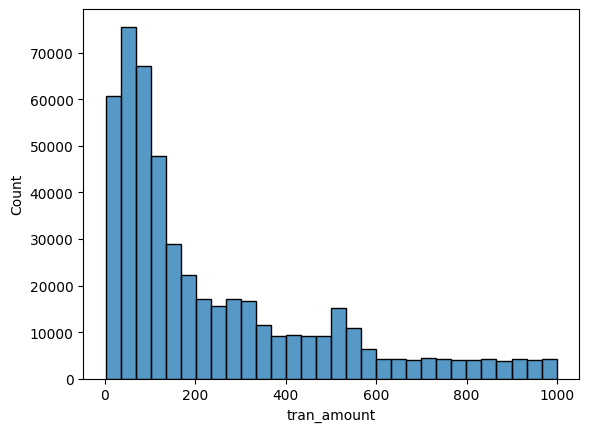

In [109]:
sns.histplot(df_transactions[df_transactions.tran_amount < 10000].tran_amount, bins=30)

In [94]:
Q1, Q3 = df_transactions['tran_amount'].quantile([0.25, 0.75])
IQR = Q3 - Q1

In [95]:
IQR

347.0

In [96]:
lower = Q1 - 2 * IQR
upper = Q3 + 2 * IQR
lower, upper

(-628.0, 1107.0)

In [97]:
tran_outliers = df_transactions[df_transactions.tran_amount >= upper]
tran_outliers.shape

(25000, 7)

In [98]:
df_transactions_normalized = df_transactions[df_transactions.tran_amount < upper]
df_transactions_normalized

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [99]:
mean_tran_per_prod_categ =df_transactions_normalized.groupby('product_category')['tran_amount'].mean()
mean_tran_per_prod_categ

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [100]:
df_transactions.loc[tran_outliers.index, 'tran_amount'] = tran_outliers['product_category'].map(mean_tran_per_prod_categ)

In [101]:
df_transactions[df_transactions.tran_amount >= upper]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


<Axes: xlabel='tran_amount', ylabel='Count'>

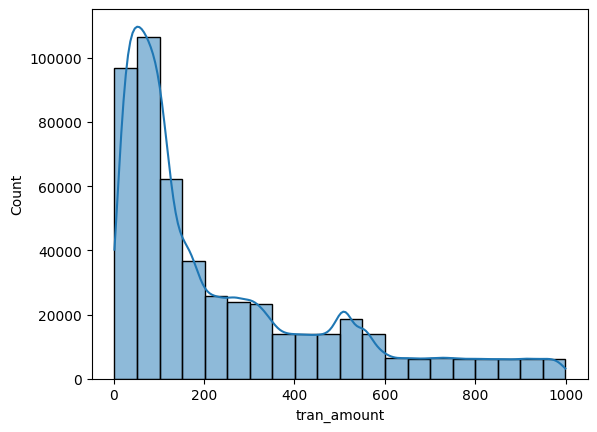

In [102]:
sns.histplot(df_transactions.tran_amount, kde = True, bins = 20)

In [103]:
#Data Visulazation On Transactions Table

In [104]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


<Axes: xlabel='payment_type', ylabel='percent'>

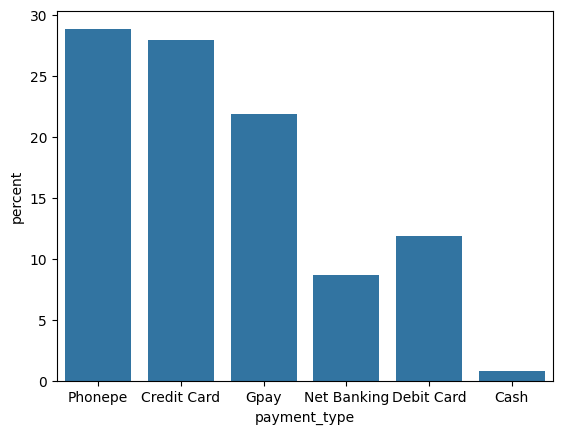

In [105]:
sns.countplot(x = df_transactions.payment_type, stat = 'percent')

In [106]:
df_merged2 = pd.merge(df_merged, df_transactions, on = 'cust_id', how = 'inner')
df_merged2.head()

,cust_id,name,gender,age,location,...,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,...,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,...,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,...,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,...,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,...,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


<Axes: xlabel='age_group', ylabel='count'>

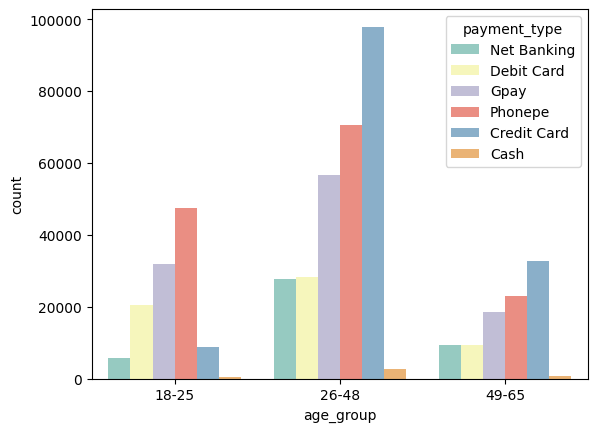

In [107]:
sns.countplot(x = "age_group", hue = "payment_type", data = df_merged2, palette = 'Set3')

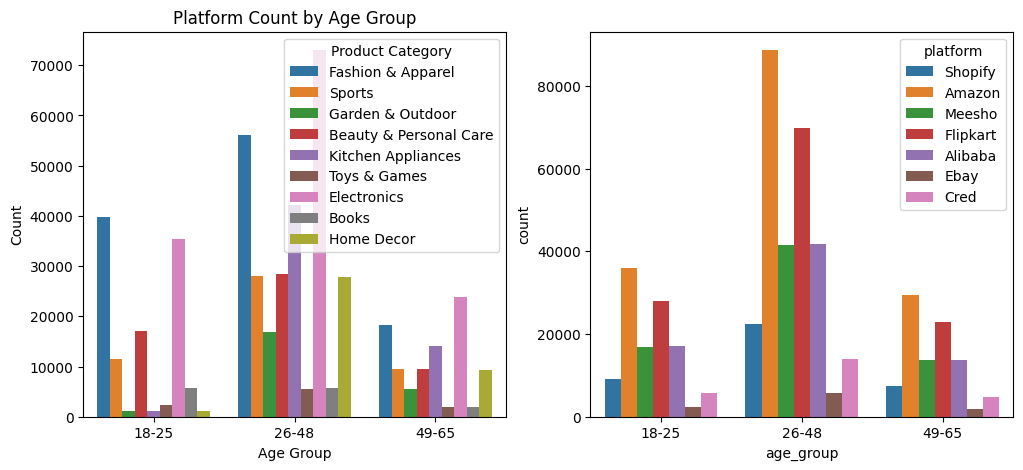

In [110]:
fig , (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))
sns.countplot(x = "age_group", hue = "product_category", data = df_merged2, ax = ax1)
ax1.set_title('Product Category Count by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
ax1.legend(title = 'Product Category', loc = 'upper right')

sns.countplot(x = "age_group", hue = "platform", data = df_merged2, ax = ax2)
ax1.set_title('Platform Count by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
ax1.legend(title = 'Product Category', loc = 'upper right')


plt.show()

In [111]:
# More Efficient Method

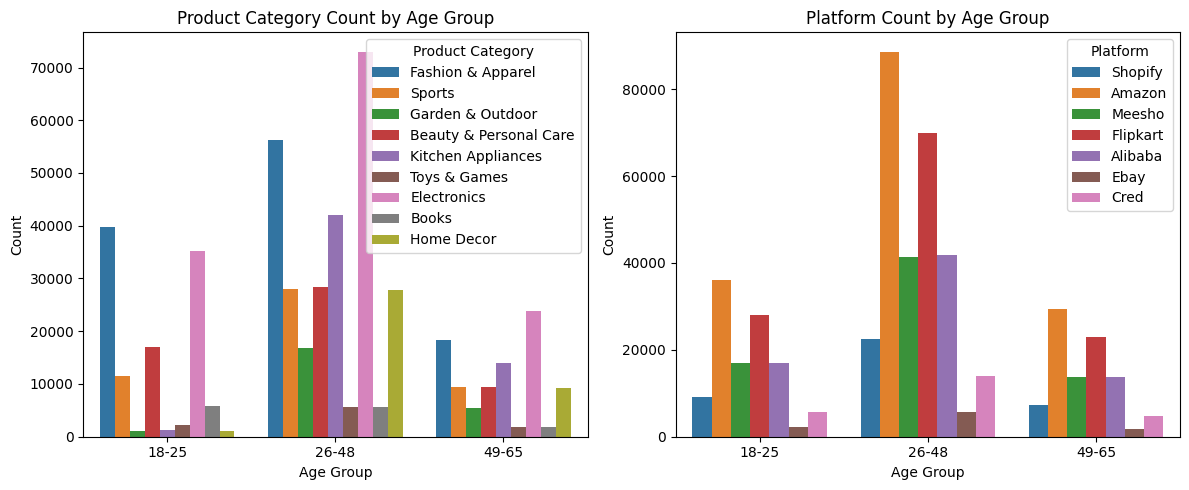

In [114]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define plot configurations for each subplot
plot_settings = [
    {
        "x": "age_group",
        "hue": "product_category",
        "data": df_merged2,
        "title": "Product Category Count by Age Group",
        "legend_title": "Product Category"
    },
    {
        "x": "age_group",
        "hue": "platform",
        "data": df_merged2,
        "title": "Platform Count by Age Group",
        "legend_title": "Platform"
    },
]

# Loop over axes and plot settings
for ax, settings in zip(axes, plot_settings):
    sns.countplot(x=settings["x"], hue=settings["hue"], data=settings["data"], ax=ax)
    ax.set_title(settings["title"])
 ax.set_xlabel('Age Group')
    ax.set_ylabel('Count')
    ax.legend(title=settings["legend_title"], loc='upper right')

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
